In [1]:
from sympy import *
init_printing() #muestra símbolos más agradables  

In [2]:
Cant_Cuerpos=3
m=symbols('m0:%s' %Cant_Cuerpos, positive=True) #masas
x=symbols('x0:%s' %Cant_Cuerpos, real=True) #posiciones


In [3]:
#potencial
U=sum([ sum([m[i]*m[j]/abs(x[i]-x[j]) for i in range(j) ]) for j in range(Cant_Cuerpos)])

In [4]:
#centro masas (hay que considerarlo porque usaremos, más adelante, un sistema de coordenadas no baricéntrico)
c=sum([m[j]*x[j]/sum(m) for j in range(Cant_Cuerpos)])
#momento de inercia
I=sum([m[j]*(x[j]-c)**2 for j in range(Cant_Cuerpos)])

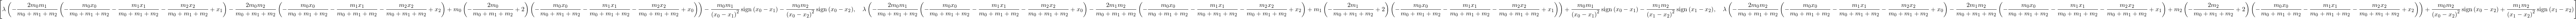

In [5]:
var('lambda_') #multiplicador, el guión bajo _ es para no entrar en conflicto con el operador lambda de python 
#Construímos el sistema de ecuaciones
Ecuaciones=[]
for j in range(Cant_Cuerpos):
    Ecuaciones+=[(U+lambda_*I).diff(x[j])]
Ecuaciones

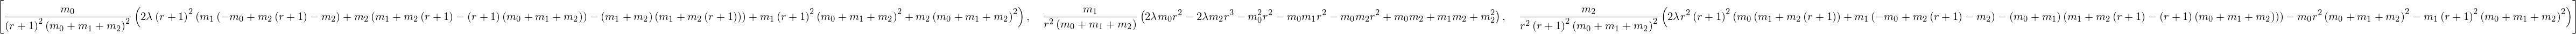

In [6]:
#sustituímos x0=0, x1=1, x2=1+r
var('r',positive=True)
EcuacionesT=[ec.subs({x[0]:0,x[1]:1,x[2]:1+r}).simplify() for ec in Ecuaciones]
EcuacionesT

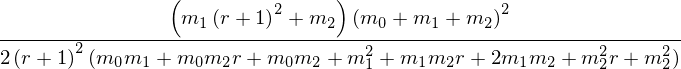

In [7]:
#según Moeckel de las tres ecuaciones sólo dos son independientes. Sólo trabajo con las dos primeras,
#primero despejemos lambda de la primer ecuacion
sol_lambda=solve(EcuacionesT[0],lambda_)
sol_lambda[0]

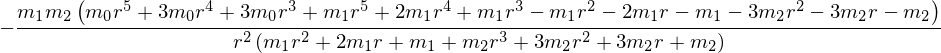

In [8]:
#sustituyamos en la segunda
Ecuacion=EcuacionesT[1].subs(lambda_,sol_lambda[0]).simplify()
Ecuacion

In [9]:
#Esta ecuación esta igualada a cero, mirando la expresión nos damos cuenta que debe ser cero
Ecuacion=m[0]*r**5 + 3*m[0]*r**4 + 3*m[0]*r**3 + m[1]*r**5 + 2*m[1]*r**4 + m[1]*r**3 - m[1]*r**2 - 2*m[1]*r - m[1] - 3*m[2]*r**2 - 3*m[2]*r - m[2]
Ecuacion.collect(r)
#!!!!!!!!!!!!  Da lo mismo que el artículo de la scholarpedia!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [10]:
#No hay fórmula general para hallar raíces de polinomios de grado mayor a 4, se pueden encontrar numéricamente
#Voy a usar el módulo numpy (numeric python) para hallar soluciones. 
#numpy tiene el comando roots que haya numéricamente raíces de polinomios. El argumento de roots es la lista
#de coeficientes, por eso primero pongo los coeficientes del polinomio en una lista
L=[Ecuacion.diff(r,i).subs(r,0)/factorial(i) for i in range(6)]
L=L[::-1]
L


In [11]:
# No podemos usar masas arbitrarias, hay que especificarles un valor. tome m0=3,m1=2, m2=1
L_part=[coef.subs({m[0]:3,m[1]:2,m[2]:1}) for coef in L]
L_part

In [12]:
#importo numpy. El adverbio "as" -propio del lenguaje- me permite asignarle un prefijo a los comandos de 
#numpy -en este caso-sirve para distinguir los comandos de módulos distintos y prevenir conflictos de que un 
#comando que este en 2 módulos )
import numpy as np
sol=np.roots(L_part)
sol

array([-1.28934480+0.89224847j, -1.28934480-0.89224847j,
        0.78067186+0.j        , -0.40099113+0.38964196j,
       -0.40099113-0.38964196j])

In [13]:
sol.imag

array([ 0.89224847, -0.89224847,  0.        ,  0.38964196, -0.38964196])

In [14]:
#La única solución real es la tercera de la lista
sol[2].real